In [1]:
import os 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import read_file_parameters



In [2]:
EXPERIMENT_PATH = os.path.join(repo_root, 'exp', 'ex02')
os.chdir(EXPERIMENT_PATH)

In [30]:
def file_handlers(): 
    data_path = os.path.join(os.getcwd(), 'data')

    all_results = []
    
    for file in os.listdir(data_path):
        if file.endswith('.csv'):
      
            file_path = os.path.join(data_path, file)
            df = pd.read_csv(file_path)

            result = {
                    'Ours': df['Ours'].mean(), 
                    'Zermello': df['Zermello'].mean(),
                    'higher_order_speedup': df['Zermello'].mean() / df['Ours'].mean(),
                    'Ours_BIN': df['Ours_bin'].mean(),
                    'Zermello_BIN' : df['Zermello_bin'].mean(),
                    'binary_speedup': df['Zermello_bin'].mean() / df['Ours_bin'].mean()
                      }

            dataset_param = read_file_parameters(file)
            result.update(dataset_param)

            all_results.append(result)

    final_df = pd.DataFrame(all_results).apply(pd.to_numeric, errors='ignore')
    final_df['R'] = final_df['N']/ final_df['M']
    return final_df.sort_values(by=['L', 'N', 'M', 'K'])

In [31]:
df = file_handlers()
df.to_csv('results/Convergence_Table.csv')
display(df.head().style.hide(axis='index'))

/tmp/ipykernel_39010/3228734633.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = pd.DataFrame(all_results).apply(pd.to_numeric, errors='ignore')


Ours,Zermello,higher_order_speedup,Ours_BIN,Zermello_BIN,binary_speedup,N,M,K,L,R
9.280000,79.940000,8.614224,9.280000,79.940000,8.614224,1000,1000,2,0,1.000000
13.100000,72.220000,5.512977,11.880000,160.200000,13.484848,1000,1000,4,0,1.000000
12.980000,67.480000,5.198767,11.580000,187.880000,16.224525,1000,1000,5,0,1.000000
13.000000,62.880000,4.836923,11.140000,208.820000,18.745063,1000,1000,6,0,1.000000
13.000000,69.060000,5.312308,11.300000,253.920000,22.470796,1000,1000,8,0,1.000000


### Ratio

In [35]:
ho_df = df[(df['L'] == 0.0) & (df['K'] != 5)]

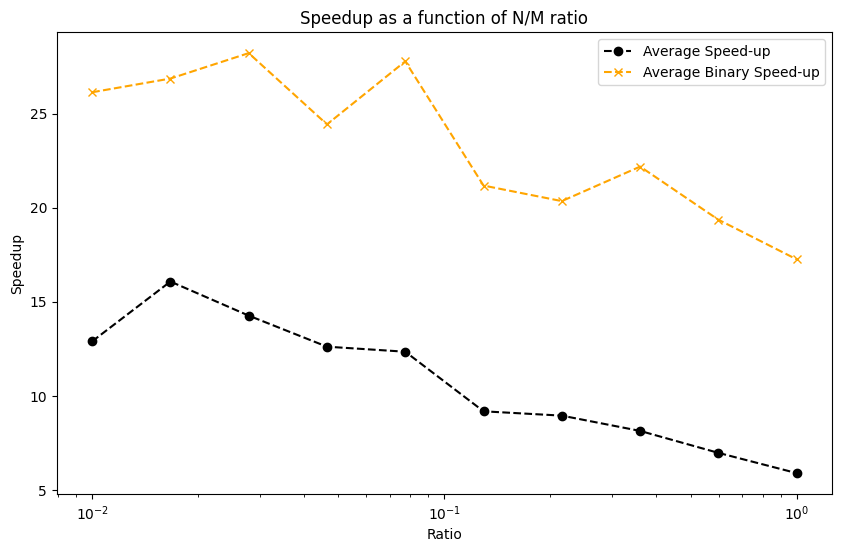

In [36]:

grouped = ho_df.groupby(by=['R']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Speedup as a function of N/M ratio')
plt.plot(grouped['R'], grouped['higher_order_speedup'], marker='o', color='black', linestyle = '--', label='Average Speed-up')
plt.plot(grouped['R'], grouped['binary_speedup'], marker='x', color='orange', linestyle = '--', label='Average Binary Speed-up')
plt.xscale('log')
plt.xlabel('Ratio')
plt.ylabel('Speedup')
plt.legend()

### Hyperedge Size

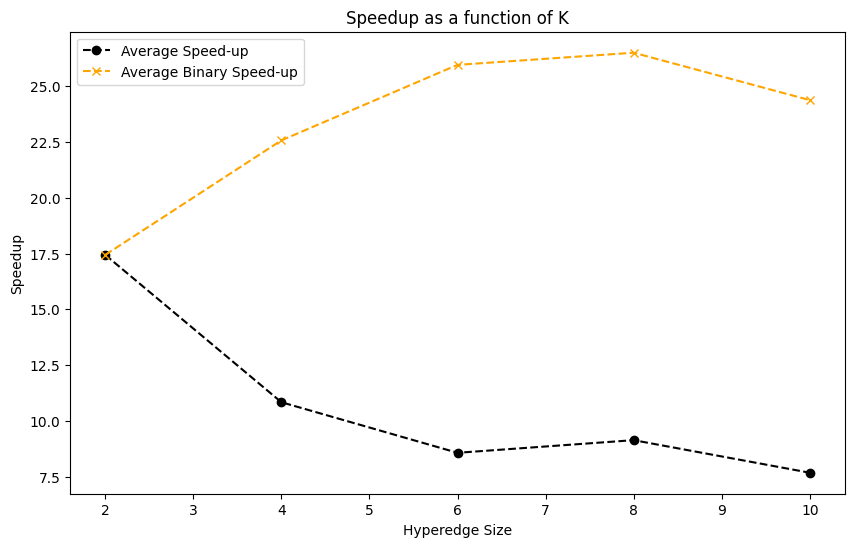

In [37]:
grouped = ho_df.groupby(by=['K']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Speedup as a function of K')
plt.plot(grouped['K'], grouped['higher_order_speedup'], marker='o', color='black', linestyle = '--', label='Average Speed-up')
plt.plot(grouped['K'], grouped['binary_speedup'],marker='x', color='orange', linestyle = '--', label='Average Binary Speed-up')
plt.xlabel('Hyperedge Size')
plt.ylabel('Speedup')
plt.legend()